Import Dataset

In [1]:
! pip install opendatasets
! pip install pandas
! pip install tensorflow

In [3]:
import opendatasets as od
import pandas
# display, transform, read, split ...
import numpy as np
import os
import matplotlib.pyplot as plt

# tensorflow
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

od.download(
    "https://www.kaggle.com/datasets/alessiocorrado99/animals10?resource=download")

Skipping, found downloaded files in ".\animals10" (use force=True to force download)


Building, compiling, training network model

In [5]:

IMG_SIZE = (100, 100)
BATCH = 32
EPOCHS = 5
LEARNING_RATE = 0.001

# Define data augmentation strategy
dataset = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    rescale=1.0/255.0,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load training and validation datasets
train_gen = tf.keras.preprocessing.image_dataset_from_directory(
    'C:/Users/Ace/Downloads/animals10/raw-img',
    validation_split=0.2,
    subset='training',
    label_mode='int',  # Use 'int' since your labels are integers
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH
)

val_gen = tf.keras.preprocessing.image_dataset_from_directory(
    'C:/Users/Ace/Downloads/animals10/raw-img',
    validation_split=0.2,
    subset="validation",
    label_mode='int',  # Use 'int' since your labels are integers
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH
)

# Define ResNet50 model with custom head
model = Sequential()
pretrained_model = tf.keras.applications.ResNet50(include_top=False,
                                                           input_shape=(100, 100, 3),
                                                           pooling='avg',
                                                           weights='imagenet')

for each_layer in pretrained_model.layers:
    each_layer.trainable = False

model.add(pretrained_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=LEARNING_RATE),
                          loss='sparse_categorical_crossentropy',  # Use sparse_categorical_crossentropy for integer labels
                          metrics=['accuracy'])

# Train the model
history = model.fit(train_gen,
                    validation_data=val_gen,
                    epochs=EPOCHS)

Found 26179 files belonging to 10 classes.
Using 20944 files for training.
Found 26179 files belonging to 10 classes.
Using 5235 files for validation.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 21s 0us/step
Epoch 1/5
655/655 ━━━━━━━━━━━━━━━━━━━━ 304s 450ms/step - accuracy: 0.6852 - loss: 1.0889 - val_accuracy: 0.7788 - val_loss: 0.6614
Epoch 2/5
655/655 ━━━━━━━━━━━━━━━━━━━━ 283s 432ms/step - accuracy: 0.8166 - loss: 0.5437 - val_accuracy: 0.7880 - val_loss: 0.6406
Epoch 3/5
655/655 ━━━━━━━━━━━━━━━━━━━━ 277s 423ms/step - accuracy: 0.8534 - loss: 0.4212 - val_accuracy: 0.7977 - val_loss: 0.6594
Epoch 4/5
655/655 ━━━━━━━━━━━━━━━━━━━━ 289s 441ms/step - accuracy: 0.8796 - loss: 0.3461 - val_accuracy: 0.7987 - val_loss: 0.6673
Epoch 5/5
655/655 ━━━━━━━━━━━━━━━━━━━━ 275s 419ms/step - accuracy: 0.9081 - loss: 0.2638 - val_accuracy: 0.8036 - val_loss: 0.6951


Save model

In [6]:
my_model = 'my_model_path.h5'
model.save(my_model)
print("Model saved successfully at:", my_model)
loaded_model = tf.keras.models.load_model(my_model)

Model saved successfully at: my_model_path.h5


Evaluation and Plot

In [7]:
score = model.evaluate(val_gen)
print('Total loss on Testing Set:', score[0])
print('Accuracy of Testing Set:', score[1])

164/164 ━━━━━━━━━━━━━━━━━━━━ 55s 335ms/step - accuracy: 0.8088 - loss: 0.6664
Total loss on Testing Set: 0.6951361298561096
Accuracy of Testing Set: 0.8036293983459473


In [8]:
proba = model.predict(val_gen)
proba.round(2)

164/164 ━━━━━━━━━━━━━━━━━━━━ 58s 342ms/step


array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.7 , 0.  , 0.  , ..., 0.27, 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.83, 0.04, 0.01, ..., 0.01, 0.  , 0.03],
       [0.22, 0.37, 0.  , ..., 0.26, 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]], dtype=float32)

In [9]:
pred = np.argmax(model.predict(val_gen), axis=-1)

164/164 ━━━━━━━━━━━━━━━━━━━━ 51s 313ms/step


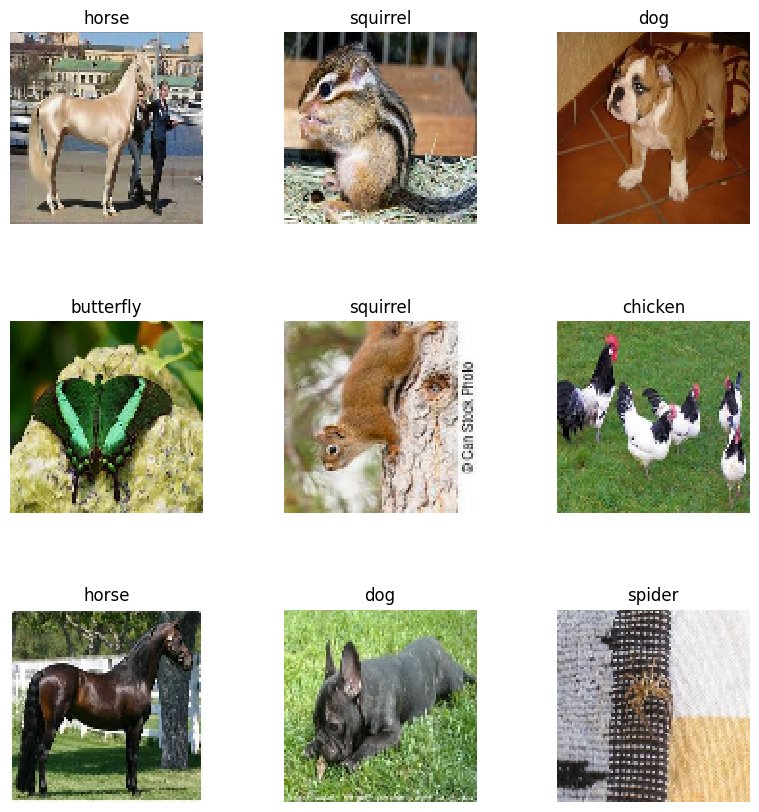

In [12]:
translate = {"cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep", "ragno": "spider", "scoiattolo": "squirrel"}
classes=train_gen.class_names
plt.figure(figsize=(10,10), dpi=100)
for images,labels in train_gen.take(1):
    for n in  range(9):
        ax=plt.subplot(3,3,n+1)
        plt.imshow(images[n].numpy().astype('uint8'), cmap="binary", interpolation="nearest")
        translated_label = translate[classes[labels[n]]]
        plt.title(translated_label, fontsize=12)
        plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

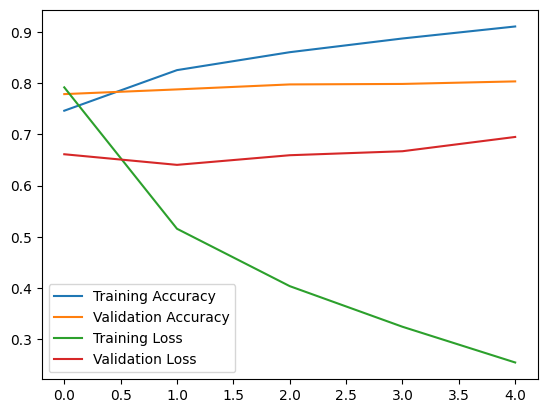

In [11]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()